Time interval: δt=0.08333333333333333 years
Simulation path M=50000
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape of rate_path: (121,)
Shape of time_points: (121,)
Shape o

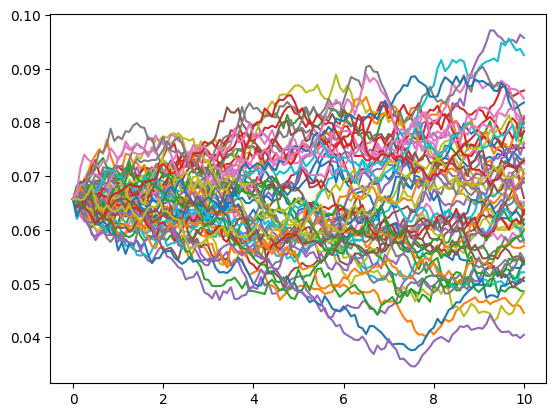

The expected value for the interest rate is: 6.532%
The standard error of sample mean is: 0.0053%
Lower 95% is: 6.522%
Upper 95% is: 6.543%


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rn

a = 0.025340788
b = 0.064199967
σ = 0.016393008

r0 = 0.0657
T = 10
N = 120
δt = T/N
print(f"Time interval: δt={δt} years")
M = int(5*1e4)
print(f"Simulation path M={M}")
dz = rn.randn(M,N)
r = r0*np.ones((M,N+1))
for i in range(0,N):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*δt + σ*np.sqrt(r[:,i])*dz[:,i]*np.sqrt(δt)
plt.show()

a_indices = [ rn.randint(0,M) for j in range(1,60)]

for runer in a_indices:
    time_points = np.linspace(0, T, N+1)  # Ensures N+1 points
    rate_path = r[runer]
    print(f"Shape of time_points: {time_points.shape}")
    print(f"Shape of rate_path: {rate_path.shape}")
    plt.plot(time_points, rate_path)
plt.show()
V = (r[:,-1])
print("The expected value for the interest rate is:","{:.3%}".format(np.mean(V)))
print("The standard error of sample mean is:", "{:.4%}".format(np.std(V)/np.sqrt(M)))
from scipy.stats import norm
def normsinv(x):
    x = norm.ppf(x)
    return (x)

z = normsinv(0.975)
μ = np.mean(V)
SE = np.std(V)/np.sqrt(M)

print("Lower 95% is:","{:.3%}".format( (μ-z*SE) ))
print("Upper 95% is:","{:.3%}".format( (μ+z*SE) ))